## 用keras来搭建一个回归模型

#### 引入相关包

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using Theano backend.


#### generate some data

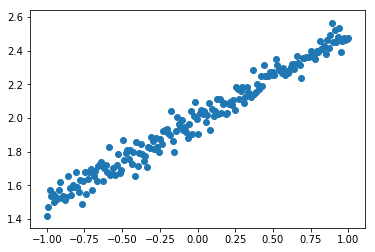

In [4]:
# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X, Y)
plt.show()

In [5]:
X_train, Y_train = X[:160], Y[:160]     # first 160 data points
X_test, Y_test = X[160:], Y[160:]       # last 40 data points

#### 构建神经网络

In [9]:
# build a neural network from the 1st layer to the last layer
model = Sequential()

model.add(Dense(units=1, input_dim=1)) #model.add(Dense(output_dim=1, input_dim=1)) 

# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd')


#### 训练神经网络

In [10]:
# training
##train_on_batch：Single gradient update over one batch of samples. 对数据块进行计算并梯度更新
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

Training -----------
train cost:  4.050965309143066
train cost:  0.09595142304897308
train cost:  0.01011736411601305
train cost:  0.004202243406325579


#### 模型对测试集进行验证预测并获取模型参数

In [12]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)



Testing ------------
40/40 [==============================] - 0s
test cost: 0.00421858485788
Weights= [[ 0.5765987]] 
biases= [ 1.99138284]


#### 可视化预测的结果

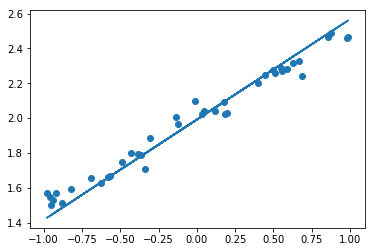

In [13]:
# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()